In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import nltk

# nltk.download('punkt')
from nltk.corpus import stopwords
import string
string.punctuation
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from mlxtend.plotting import plot_confusion_matrix
# nltk.download('stopwords')
stopwords.words('english')
%matplotlib inline

In [2]:
# from google.colab import files
# df = files.upload()

## 1. Data Cleaning and Preprocessing

In [3]:
df = pd.read_csv('email-categories.csv')

In [4]:
df.isnull().sum()

category    0
title       0
body        5
dtype: int64

In [5]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [6]:
df.isnull().sum()

category    0
title       0
body        0
dtype: int64

In [7]:
df.tail(10)

,category,title,body
6862,WOMEN,Your Compliments Are Gross And So Are You,Upon reading my fair share of social media pos...
6863,WOMEN,Ghoul Power!,"Picking out a Halloween costume can be tough, ..."
6864,WOMEN,IVF Confessions: in Defense of Egg Freezing,When the media reported earlier this month tha...
6865,WOMEN,e Need To Stop Judging Other Women for Their H...,"It's October, and the pumpkin spice lattes are..."
6866,WOMEN,Women Who Run,As I listened to Kathrine Switzer describe her...
6867,WOMEN,Casually Fearless: Why Millennials Are Natural...,I still think about that Tuesday night dinner ...
6868,WOMEN,Happy Birthday To Us,I remember the morning of my high school gradu...
6869,WOMEN,The Culture of Love,"My husband, Gene, doesn't wear pajamas. I aske..."
6870,WOMEN,"Carpe Diem, Oprah Style","\nBy AntonioGuillem, via ThinkStock\nBy Lisa ..."
6871,WOMEN,My Month of Online Dating Detox,My name is Jamie and I'm an online date-aholic...


<AxesSubplot:title={'center':'Count of each category'}, xlabel='category', ylabel='count'>

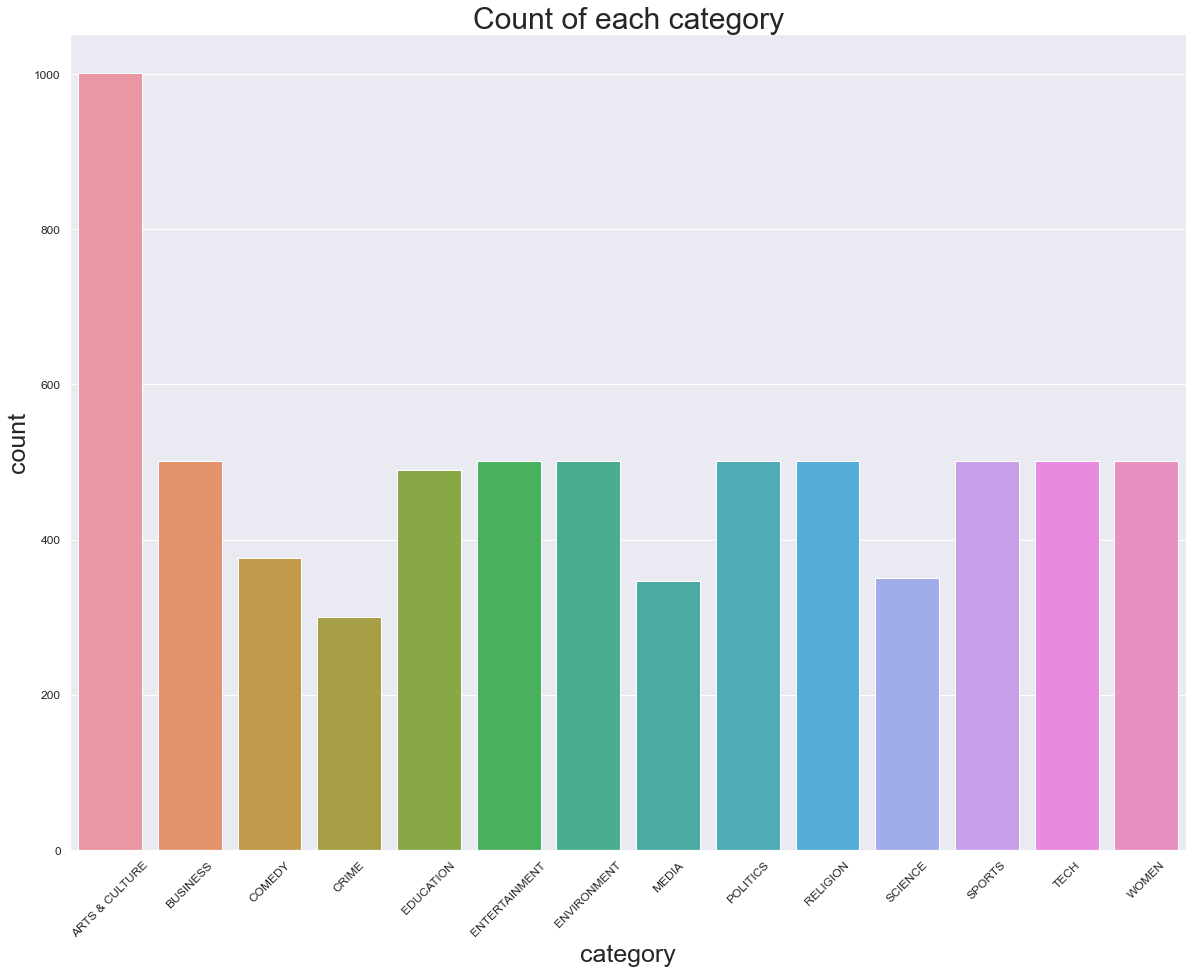

In [8]:
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111)
plt.xlabel("", fontsize=25)
plt.ylabel("", fontsize=25)
plt.xticks(rotation=45)
plt.title("Count of each category", fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=12)
x_data = df['category']
sns.countplot(x = x_data)

In [9]:
df = df[df.category != "WOMEN"]
df = df[df.category != "ENVIRONMENT"]
df = df[df.category != "CRIME"]

In [10]:
df= df.replace(["SCIENCE", "TECH"], "SCIENCE & TECH")
df= df.replace(["ENTERTAINMENT", "COMEDY"], "ENTERTAINMENT")
df= df.replace(["POLITICS", "MEDIA"], "NEWS & POLITICS")

<AxesSubplot:title={'center':'Count of each category'}, xlabel='category', ylabel='count'>

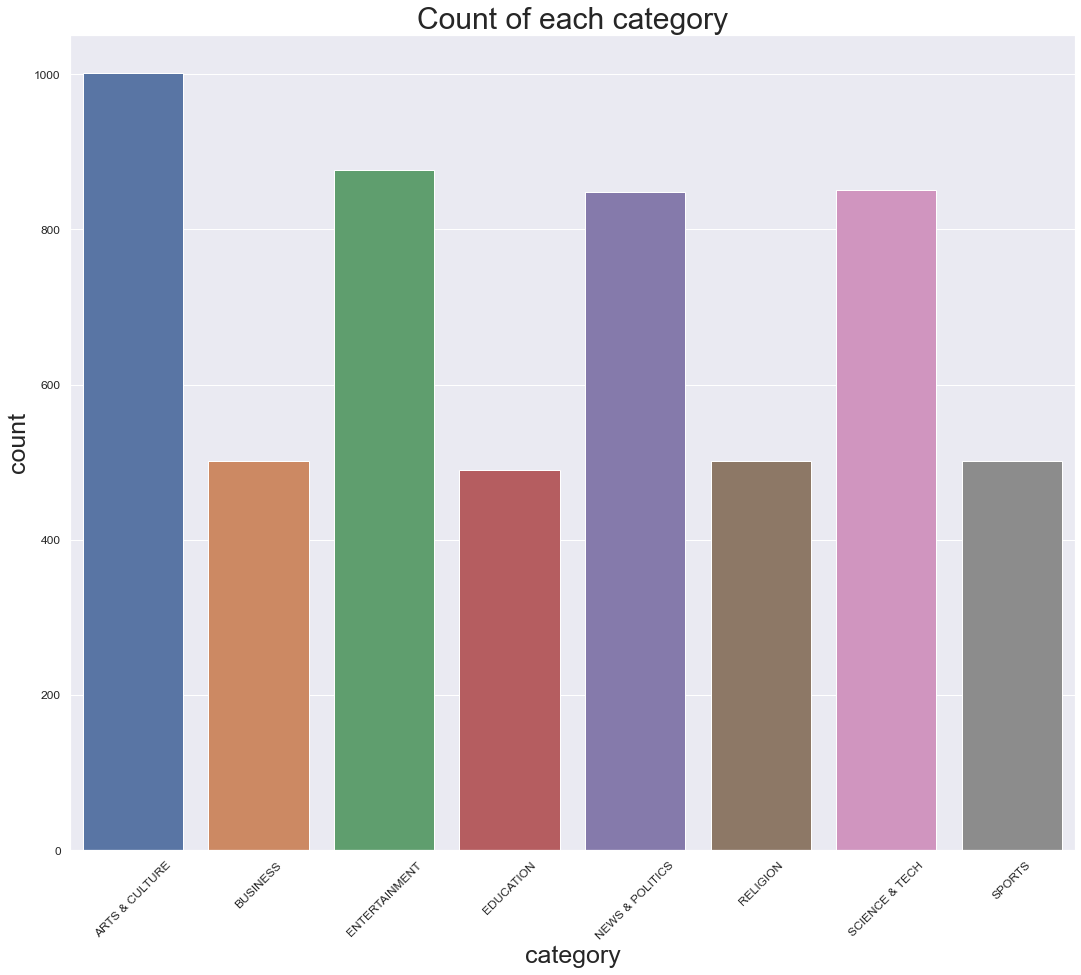

In [11]:
fig = plt.figure(figsize=(18, 15))
ax = fig.add_subplot(111)
plt.xlabel("", fontsize=25)
plt.ylabel("", fontsize=25)
plt.xticks(rotation=45)
plt.title("Count of each category", fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=12)
x_data = df['category']
sns.countplot(x = x_data)

In [12]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [13]:
stop_words = stopwords.words('english')
list(stop_words)
punc = ['!', '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', ':', ';', '<' ,'=', '>', '?', '@', '[', ']', '^', '_', '`', '{', '|', '}', '~', "'", ","]
redundant_words = ["said", "one", "use"]
stop_words = stop_words + punc + redundant_words

df['body'] = df['body'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word.lower() not in stop_words]))
#df['body'] = df['body'].apply(transform_text)

In [14]:
x = df.drop(columns = ["category"])
y = df['category']

## 2. Visualizing the Word Cloud

In [15]:
from wordcloud import WordCloud, STOPWORDS
stop_words = set(STOPWORDS)
wc = WordCloud(width=500,
               height=500,
               min_font_size=10,
               background_color='white',
               stopwords=stop_words)

Text(0.5, 1.0, 'Sports')

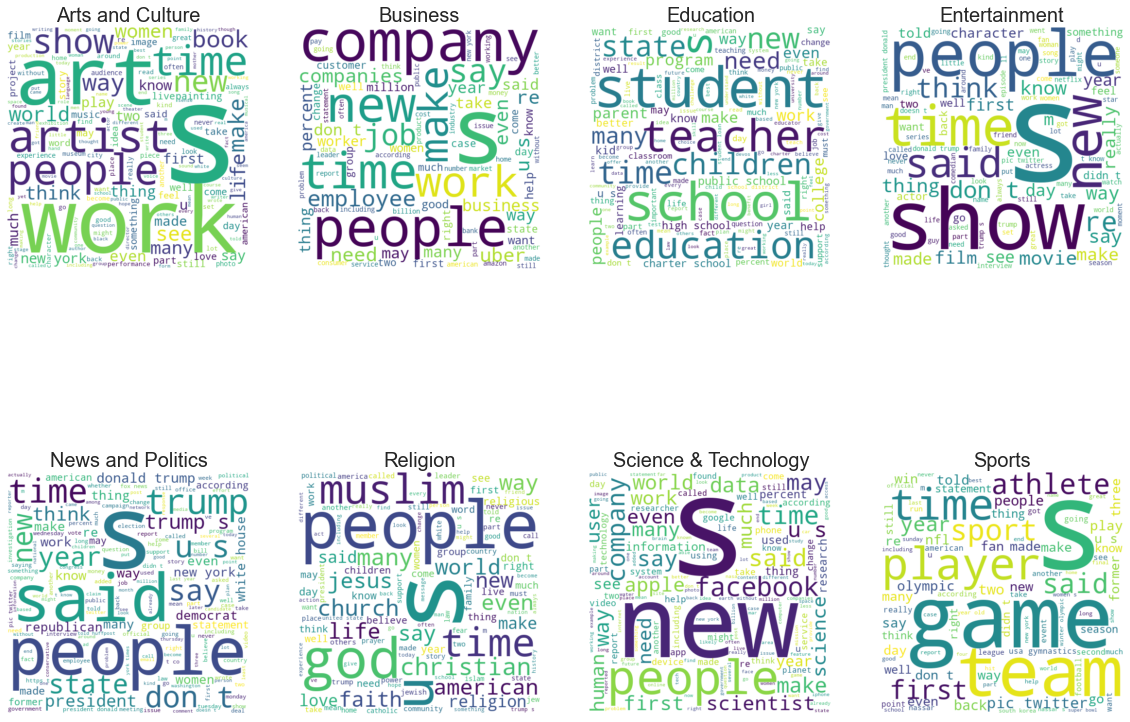

In [16]:
fig = plt.figure(figsize=(20, 15))

art_wc = wc.generate(df[df['category'] == 'ARTS & CULTURE']['body'].str.cat(sep=" "))
plt.subplot(2, 4, 1)
plt.imshow(art_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Arts and Culture", fontsize=20)

bus_wc = wc.generate(df[df['category'] == 'BUSINESS']['body'].str.cat(sep=" "))
plt.subplot(2, 4, 2)
plt.imshow(bus_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Business", fontsize=20)

edu_wc = wc.generate(df[df['category'] == 'EDUCATION']['body'].str.cat(sep=" "))
plt.subplot(2, 4, 3)
plt.imshow(edu_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Education", fontsize=20)

ent_wc = wc.generate(df[df['category'] == 'ENTERTAINMENT']['body'].str.cat(sep=" "))
plt.subplot(2, 4, 4)
plt.imshow(ent_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Entertainment", fontsize=20)

news_wc = wc.generate(df[df['category'] == 'NEWS & POLITICS']['body'].str.cat(sep=" "))
plt.subplot(2, 4, 5)
plt.imshow(news_wc, interpolation='bilinear')
plt.axis('off')
plt.title("News and Politics", fontsize=20)

rel_wc = wc.generate(df[df['category'] == 'RELIGION']['body'].str.cat(sep=" "))
plt.subplot(2, 4, 6)
plt.imshow(rel_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Religion", fontsize=20)

sci_wc = wc.generate(df[df['category'] == 'SCIENCE & TECH']['body'].str.cat(sep=" "))
plt.subplot(2, 4, 7)
plt.imshow(sci_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Science & Technology", fontsize=20)

sport_wc = wc.generate(df[df['category'] == 'SPORTS']['body'].str.cat(sep=" "))
plt.subplot(2, 4, 8)
plt.imshow(sport_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Sports", fontsize=20)



## 3. Data Processing

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state = 2, test_size = 0.15)
x_train

,title,body
285,"R.I.P. Dandelion, The First Crayola Crayon To ...","earlier week, crayola announced plan “retire” ..."
4693,Human Nature Unleashed: #Charlottesville,"let’s pretend you’re white man living, say, we..."
6131,Experts Are Building A 'Pokemon Go' Robot For ...,"may seem like everyone playing “pokemon go,” p..."
3029,'Crazy Rich Asians' Trailer Is Already A Magni...,"it’s here, people! trailer upcoming “crazy ric..."
2815,Billie Lourd Honors Those Having A Tough Mothe...,billie lourd took moment sunday honor anyone e...
...,...,...
2795,Jim Carrey's New Blood-Dripping Portrait Takes...,jim carrey taken aim national rifle associatio...
3071,Ellen Burstyn Predicts The Future: 'We'll Be T...,ellen burstyn good talking. seated living room...
644,13 Ways Artists Around The World Have Interpre...,"happy (almost) birthday, america! hope celebra..."
931,The Art Money 20: Which Artists Have Performed...,article originally appeared artnet news. eilee...


In [18]:
y_train

285     ARTS & CULTURE
4693          RELIGION
6131    SCIENCE & TECH
3029     ENTERTAINMENT
2815     ENTERTAINMENT
             ...      
2795     ENTERTAINMENT
3071     ENTERTAINMENT
644     ARTS & CULTURE
931     ARTS & CULTURE
2731     ENTERTAINMENT
Name: category, Length: 4734, dtype: object

In [19]:
 x_test

,title,body
1770,This Pumpkin Spice-Flavored Parody Of 'Shake I...,never drink pumpkin spice latte without thinki...
561,First Nighter: St. Ann's 'Streetcar Named Desi...,although there's much praise young vic-joshua ...
2832,John Stamos Shows Off New Baby To Bob Saget An...,john stamos showed newest member house “full h...
5543,Russian Athlete Dedicates Olympic Medal To ‘Un...,"speed skater semen elistratov, first athlete r..."
4307,This Jobs Program Just Might Get People Back T...,sophie quinton baltimore — man teal hoodie men...
...,...,...
5523,Pity The Fools Who Don't Love Mr. T's Inspirat...,mr. getting “pumped” pyeongchang 2018. actor 1...
4535,Brazilian And Chinese-American Apostles Divers...,mormon church selected first-ever latin americ...
6292,Amazon Actually Beats Netflix In The One Area ...,value quality quantity want pay streaming serv...
5224,Donald Trump's Border Wall Could Have 'Yuge' E...,"donald trump’s plan build towering, migrant-pr..."


In [20]:
y_test

1770      ENTERTAINMENT
561      ARTS & CULTURE
2832      ENTERTAINMENT
5543             SPORTS
4307    NEWS & POLITICS
             ...       
5523             SPORTS
4535           RELIGION
6292     SCIENCE & TECH
5224     SCIENCE & TECH
5307     SCIENCE & TECH
Name: category, Length: 836, dtype: object

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english")
train_vec = vectorizer.fit_transform(x_train['body'])
print(train_vec)

  (0, 57962)	0.03190780612898201
  (0, 41549)	0.04204417353315916
  (0, 27347)	0.06811295213761606
  (0, 64388)	0.04054916959620305
  (0, 62380)	0.03301652594366443
  (0, 26852)	0.02146822144401718
  (0, 2437)	0.033325212052718434
  (0, 20857)	0.03553188054609913
  (0, 114)	0.024248260710405957
  (0, 688)	0.06811295213761606
  (0, 45001)	0.025633183582612053
  (0, 58065)	0.0367948683567251
  (0, 5683)	0.024292511643885992
  (0, 49377)	0.020231356569093285
  (0, 56578)	0.023966005178967797
  (0, 55163)	0.05802475423542946
  (0, 950)	0.04005744157407579
  (0, 35825)	0.029499860504803587
  (0, 18701)	0.04428542053957621
  (0, 31263)	0.03450132721601709
  (0, 17793)	0.04715933537128115
  (0, 2383)	0.19945380491386236
  (0, 6952)	0.03561331930545928
  (0, 49389)	0.027999803748509765
  (0, 55153)	0.029162803712675836
  :	:
  (4733, 21332)	0.019781445242843178
  (4733, 13591)	0.026121114703911152
  (4733, 61858)	0.01772433586725655
  (4733, 34446)	0.023630288766409855
  (4733, 26852)	0.017545

In [22]:
vectorizer.vocabulary_

{'earlier': 18638,
 'week': 63201,
 'crayola': 14228,
 'announced': 4094,
 'plan': 44167,
 'retire': 48964,
 'crayon': 14229,
 'classic': 11853,
 '24': 788,
 'pack': 42232,
 'hue': 27963,
 'question': 46633,
 'supposed': 56589,
 'revealed': 49057,
 'friday': 23222,
 'known': 32583,
 'coloring': 12495,
 'aficionados': 2878,
 'national': 39365,
 'day': 15311,
 'truly': 59753,
 'historic': 27297,
 'news': 39858,
 'slipped': 53654,
 'early': 18641,
 'thursday': 58472,
 'world': 64184,
 'learned': 33593,
 'color': 12485,
 'announcing': 4100,
 'retirement': 48968,
 'dandelion': 15091,
 'haven': 26497,
 'examined': 20592,
 'box': 8497,
 'pre': 45097,
 'yellowish': 64676,
 'confused': 13133,
 'actual': 2461,
 'yellow': 64673,
 'green': 25236,
 'confirmed': 13088,
 'twitter': 60098,
 'posting': 44901,
 'strange': 55760,
 'video': 62181,
 'animated': 4041,
 'mr': 38660,
 'traveling': 59417,
 'free': 23118,
 'man': 35611,
 'don': 17785,
 'like': 34162,
 'imagine': 28643,
 'crayons': 14230,
 'anim

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
rfc = RandomForestClassifier(max_depth=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=60, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=60,random_state=2)
rfc.fit(train_vec, y_train)
etc.fit(train_vec, y_train)
gbdt.fit(train_vec, y_train)

GradientBoostingClassifier(n_estimators=60, random_state=2)

In [24]:
var = vectorizer.transform(x_test['body'])
print(var)

  (0, 64830)	0.0935017239947489
  (0, 64647)	0.037092083918782486
  (0, 63201)	0.049033674739357776
  (0, 63084)	0.04038761459563259
  (0, 61361)	0.1252391627188433
  (0, 58304)	0.0701441949214022
  (0, 57583)	0.10731454002910595
  (0, 56891)	0.11772056356451753
  (0, 56862)	0.10334636727502743
  (0, 55956)	0.17475759023137333
  (0, 55827)	0.07294764103439282
  (0, 54673)	0.4171559362596011
  (0, 53228)	0.12364409715846227
  (0, 52260)	0.11556411774900348
  (0, 51603)	0.07282759439910366
  (0, 50517)	0.10765519244727327
  (0, 46262)	0.44937878755260563
  (0, 42662)	0.12442567502636173
  (0, 42325)	0.1309719993437416
  (0, 39822)	0.03239398729810338
  (0, 36339)	0.1333191421283021
  (0, 34649)	0.046484076277851775
  (0, 34162)	0.06640970550950145
  (0, 34097)	0.04645219198114022
  (0, 33365)	0.14979292918420187
  :	:
  (835, 12887)	0.053382628606055124
  (835, 12626)	0.04885801264878458
  (835, 12216)	0.16295800557629794
  (835, 12070)	0.04713168706542822
  (835, 11208)	0.06478087444762

In [25]:
pred_rfc = rfc.predict(var)
pred_etc = etc.predict(var)
pred_gbdt = gbdt.predict(var)

In [26]:
print("Random Forest Classifier: ", accuracy_score(y_test, pred_rfc))
print("Extra Trees Classifier: ", accuracy_score(y_test, pred_etc))
print("Gradient Boosting Decision Tree: ", accuracy_score(y_test, pred_gbdt))

Random Forest Classifier:  0.8026315789473685
Extra Trees Classifier:  0.8038277511961722
Gradient Boosting Decision Tree:  0.8385167464114832


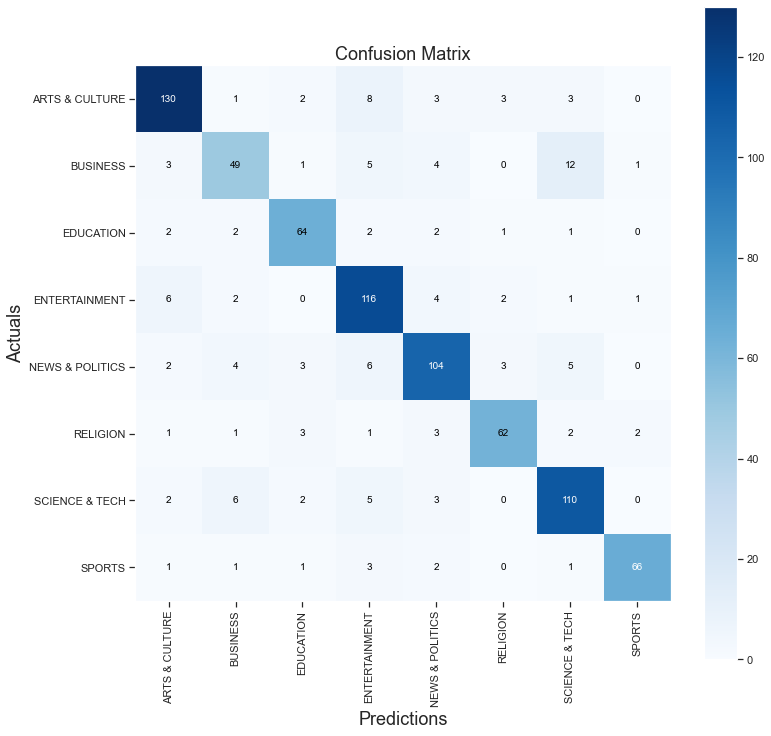

In [27]:
cm = confusion_matrix(y_test, pred_gbdt)
classNames = sorted(list(set(df['category'])))
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(12, 12), 
                                cmap=plt.cm.Blues,
                                colorbar=True,
                                class_names=classNames)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.xticks(rotation = "vertical")
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## 4. Predicting the Outcome

In [28]:
data = input()
data2 = {"cat" : [data] }
df2 = pd.DataFrame(data2)
df2['cat'] = df2['cat'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word.lower() not in stop_words]))
vec = vectorizer.transform(df2['cat'])

final_pred_gbdt = gbdt.predict(vec);

final_ans = final_pred_gbdt[0]
print("\nThe above email lies in the category:", final_ans)

Games and sports are not given so much importance in the country as is given to academics. As a result of this our achievements in the international arena are not very spectacular. Write a letter to the Editor of a national daily on the importance of sports and games and on the need to create awareness about it. 

The above email lies in the category: SPORTS
